In [1]:
# Célula 1: Importar as bibliotecas necessárias

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Dados fornecidos
setores = [1, 2, 3, 4, 5, 6]
produtos_fabricados = [100, 50, 15, 200, 500, 1000]

# Criando o DataFrame
df = pd.DataFrame({
    'Setor': setores,
    'Produtos_Fabricados': produtos_fabricados
})

# Exibir o DataFrame
df


,Setor,Produtos_Fabricados
0,1,100
1,2,50
2,3,15
3,4,200
4,5,500
5,6,1000


In [3]:
# Número de clusters que desejamos (por exemplo, 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Aplicando o KMeans na coluna de 'Produtos_Fabricados'
df['Cluster'] = kmeans.fit_predict(df[['Produtos_Fabricados']])

# Exibindo o DataFrame com os clusters atribuídos
df


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Setor,Produtos_Fabricados,Cluster
0,1,100,0
1,2,50,0
2,3,15,0
3,4,200,0
4,5,500,1
5,6,1000,1


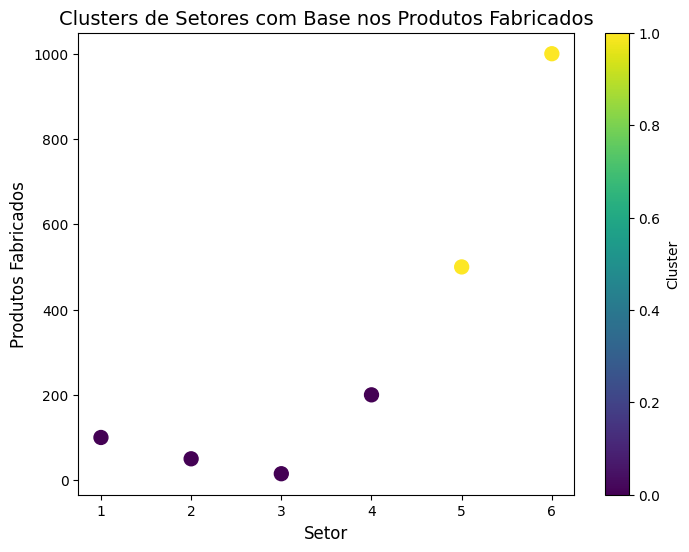

In [4]:
# Gráfico de dispersão dos setores com base nos produtos fabricados
plt.figure(figsize=(8, 6))

# Plotando os setores com base nos clusters
plt.scatter(df['Setor'], df['Produtos_Fabricados'], c=df['Cluster'], cmap='viridis', s=100)

# Adicionando rótulos e título
plt.title('Clusters de Setores com Base nos Produtos Fabricados', fontsize=14)
plt.xlabel('Setor', fontsize=12)
plt.ylabel('Produtos Fabricados', fontsize=12)

# Exibindo o gráfico
plt.colorbar(label='Cluster')
plt.show()


In [5]:
# Visualizando os centros dos clusters
print("Centros dos clusters:")
print(kmeans.cluster_centers_)

# Visualizando os setores agrupados por cluster
df_grouped = df.groupby('Cluster')['Setor'].apply(list)
print("\nSetores agrupados por cluster:")
print(df_grouped)


Centros dos clusters:
[[ 91.25]
 [750.  ]]

Setores agrupados por cluster:
Cluster
0    [1, 2, 3, 4]
1          [5, 6]
Name: Setor, dtype: object
